### 2. Simple Linear Regression

In [1]:
# Load all Libraries/Datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


ds1 = pd.read_csv( "gt_2011.csv" )
ds2 = pd.read_csv( "gt_2012.csv" )
ds3 = pd.read_csv( "gt_2013.csv" )
ds4 = pd.read_csv( "gt_2014.csv" )
ds5 = pd.read_csv( "gt_2015.csv" )

# Concatenate all dataframes
frames = [ ds1, ds2, ds3, ds4, ds5 ]
gt_df = pd.concat( frames )

# Saving merged ds into a separate .csv file for ease
pd.DataFrame.to_csv( gt_df, "CombinedDataSet.csv", index=False )

# Split the data into training ( 80 % ) and test set ( 20 % )
x = gt_df.iloc[ :, [ 0, 1, 2, 3, 4, 5, 6, 8 ] ].values
y = gt_df.iloc[ :, [ 7, 9, 10 ] ].values

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=100 )
gt_df.head( )

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [2]:
# 1.1 For each target (TEY, CO, NOx), find one feature (from F1 to F8) that has the highest
# Pearson's correlation with it(Note: Absolute value of r). Build a simple linear regression
# model for each of the three cases and save the trained models. (each model uses a single
# feature to predict a single target variable) (5 points)

corr_mat = gt_df.corr( )
corr_mat[ "TEY" ].abs( ).sort_values( ascending=False )
corr_mat[ "CO" ].abs( ).sort_values( ascending=False )
corr_mat[ "NOX" ].abs( ).sort_values( ascending=False )

NOX     1.000000
AT      0.558174
CO      0.340606
TIT     0.213865
GTEP    0.201630
AP      0.191938
AFDP    0.188247
CDP     0.171256
AH      0.164617
TEY     0.116127
TAT     0.092791
Name: NOX, dtype: float64

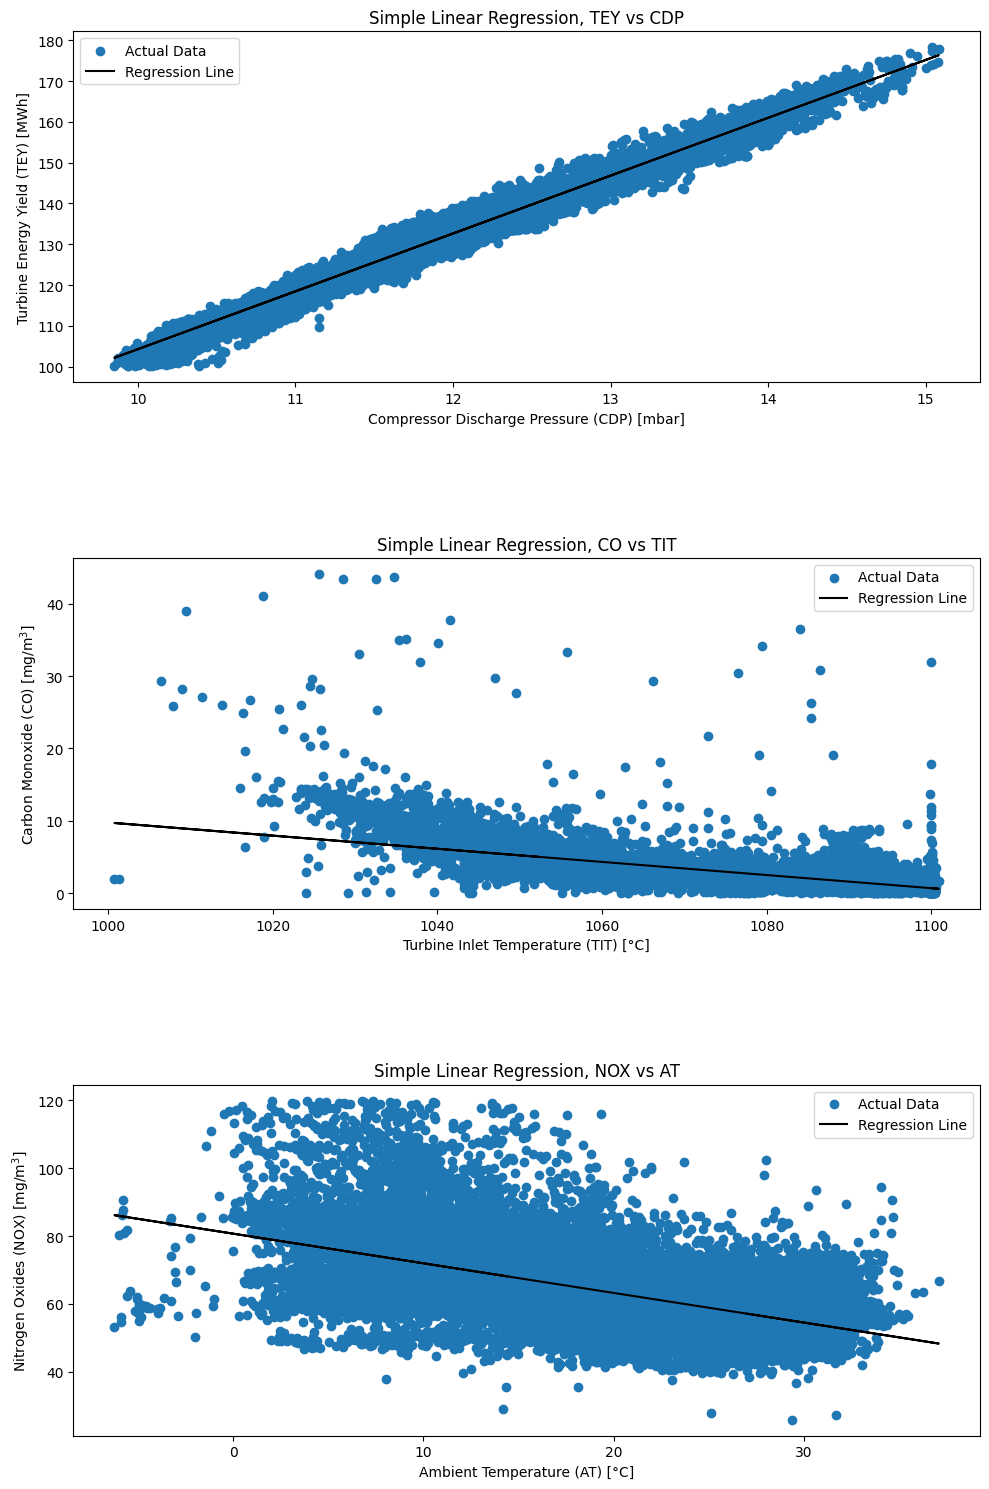

In [3]:
# 1.2 Simple Linear Regression for each Target Variable
# Determined previously, the feature that has the highest correlation with TEY is CDP

simp_lin_reg1 = LinearRegression( )
simp_lin_reg2 = LinearRegression( )
simp_lin_reg3 = LinearRegression( )

# Let X1 = CDP and Y1 = TEY
x1_train = x_train[ :, 7].reshape( -1, 1 )
x1_test = np.array( x_test[ :, 7] ).reshape( -1, 1 )
y1_train = np.array( y_train[ :, 0 ] )
y1_test = np.array( y_test[ :, 0 ] )
simp_lin_reg1.fit( x1_train, y1_train )

# Let X2 = TIT and Y2 = CO
x2_train = x_train[ :, 5].reshape( -1, 1 )
x2_test = np.array( x_test[ :, 5] ).reshape( -1, 1 )
y2_train = np.array( y_train[ :, 1 ] )
y2_test = np.array( y_test[ :, 1 ] )
simp_lin_reg2.fit( x2_train, y2_train )

# Let X3 = AT and Y3 = NOX
x3_train = x_train[ :, 0].reshape( -1, 1 )
x3_test = np.array( x_test[ :, 0] ).reshape( -1, 1 )
y3_train = np.array( y_train[ :, 2 ] )
y3_test = np.array( y_test[ :, 2 ] )
simp_lin_reg3.fit( x3_train, y3_train )

# Create a figure with 3 subplots (3 rows, 1 column)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# First subplot for CDP vs TEY
axs[0].scatter(x1_train, y1_train, label='Actual Data')  
axs[0].plot(x1_train, simp_lin_reg1.predict(x1_train), color="black", label='Regression Line') 
axs[0].set_title("Simple Linear Regression, TEY vs CDP")
axs[0].set_xlabel("Compressor Discharge Pressure (CDP) [mbar]")
axs[0].set_ylabel("Turbine Energy Yield (TEY) [MWh]")
axs[0].legend( )

# Second subplot for TIT vs CO
axs[1].scatter(x2_train, y2_train, label='Actual Data') 
axs[1].plot(x2_train, simp_lin_reg2.predict(x2_train), color="black", label='Regression Line')  
axs[1].set_title("Simple Linear Regression, CO vs TIT")
axs[1].set_xlabel("Turbine Inlet Temperature (TIT) [°C]")
axs[1].set_ylabel("Carbon Monoxide (CO) [mg/m$^3$]")  # Using LaTeX here for m^3
axs[1].legend()  # Adding a legend

# Second subplot for AT vs NOX
axs[2].scatter(x3_train, y3_train, label='Actual Data')  
axs[2].plot(x3_train, simp_lin_reg3.predict(x3_train), color="black", label='Regression Line')  
axs[2].set_title("Simple Linear Regression, NOX vs AT")
axs[2].set_xlabel("Ambient Temperature (AT) [°C]")
axs[2].set_ylabel("Nitrogen Oxides (NOX) [mg/m$^3$]")  # Using LaTeX here for m^3
axs[2].legend()  # Adding a legend

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


In [4]:
# 2. Evaluate each model's performance on both train and test sets. Report the R-squared (R2)
# and RMSE values. (you may use built-in functions of sklearn.metrics) (5 points)

### R-Squared Values
y1_train_pred = simp_lin_reg1.predict( x1_train )
r2_1_train = r2_score( y1_train, y1_train_pred )
y1_test_pred = simp_lin_reg1.predict( x1_test )
r2_1_test = r2_score( y1_test, y1_test_pred )

y2_train_pred = simp_lin_reg2.predict( x2_train )
r2_2_train = r2_score( y2_train, y2_train_pred )
y2_test_pred = simp_lin_reg2.predict( x2_test )
r2_2_test = r2_score( y2_test, y2_test_pred )

y3_train_pred = simp_lin_reg3.predict( x3_train )
r2_3_train = r2_score( y3_train, y3_train_pred )
y3_test_pred = simp_lin_reg3.predict( x3_test )
r2_3_test = r2_score( y3_test, y3_test_pred )

r2_data = pd.DataFrame({ 
    "Model": [ "TEY vs CDP", "CO vs TIT", "NOX vs AT" ], 
    "R-Squared TRAINING": [ r2_1_train, r2_2_train, r2_3_train ] ,
    "R-Squared TEST": [r2_1_test, r2_2_test, r2_3_test]
    })
r2_data.head( )

### Root Mean Squared Error
rmse1_train = math.sqrt( mean_squared_error( y1_train, y1_train_pred ) )
rmse1_test = math.sqrt( mean_squared_error( y1_test, y1_test_pred ) )

rmse2_train = math.sqrt( mean_squared_error( y2_train, y2_train_pred ) )
rmse2_test = math.sqrt( mean_squared_error( y2_test, y2_test_pred ) )

rmse3_train = math.sqrt( mean_squared_error( y3_train, y3_train_pred ) )
rmse3_test = math.sqrt( mean_squared_error( y3_test, y3_test_pred ) )

rmse_data = pd.DataFrame({ 
    "Model": [ "TEY vs CDP", "CO vs TIT", "NOX vs AT" ], 
    "RMSE TRAINING": [ rmse1_train, rmse2_train, rmse3_train ] ,
    "RMSE TEST": [rmse1_test, rmse2_test, rmse3_test]
    })
rmse_data.head( )

,Model,RMSE TRAINING,RMSE TEST
0,TEY vs CDP,2.330666,2.343824
1,CO vs TIT,1.590621,1.645869
2,NOX vs AT,9.665822,9.784962


In [5]:
# 3. Split the original dataset in the following manner5.
# a. 50% training, 50% test
# b. 70% training, 30 % test
# c. 90% training, 10% test

# Let A = Scenario of 50% Training and 50% Test
# Let B = Scenario of 70% Training and 30% Test
# Let C = Scenario of 90% Training and 10% Test

xA_train, xA_test, yA_train, yA_test = train_test_split( x, y, test_size=0.5, random_state=42 )
xB_train, xB_test, yB_train, yB_test = train_test_split( x, y, test_size=0.3, random_state=42 )
xC_train, xC_test, yC_train, yC_test = train_test_split( x, y, test_size=0.1, random_state=42 )

In [6]:
# 4. Using After temperature (AT) as the feature and NOx emission (NOx) as target, build a
# simple linear regression model for each case. Calculate RMSE for both train and test sets.
# (5 points)

# Let A = Scenario of 50% Training and 50% Test
# Let B = Scenario of 70% Training and 30% Test
# Let C = Scenario of 90% Training and 10% Test

simp_lin_regA = LinearRegression( )
simp_lin_regB = LinearRegression( )
simp_lin_regC = LinearRegression( )

# Let xA, xB, xC = AT for their respective data groups
xA1_train = xA_train[ :, 0 ].reshape( -1, 1 )
xA1_test = xA_test[ :, 0  ].reshape( -1, 1 )
xB1_train = xB_train[ :, 0 ].reshape( -1, 1 )
xB1_test = xB_test[ :, 0  ].reshape( -1, 1 )
xC1_train = xC_train[ :, 0 ].reshape( -1, 1 )
xC1_test = xC_test[ :, 0  ].reshape( -1, 1 )

# Let yA, yB, yC = NOX for their repspective data groups
yA1_train = yA_train[ :, 2 ]
yA1_test = yA_test[ :, 2  ]
yB1_train = yB_train[ :, 2 ]
yB1_test = yB_test[ :, 2  ]
yC1_train = yC_train[ :, 2 ]
yC1_test = yC_test[ :, 2  ]

simp_lin_regA.fit( xA1_train, yA1_train )
simp_lin_regB.fit( xB1_train, yB1_train )
simp_lin_regC.fit( xC1_train, yC1_train )


################################################# PLOTS #################################################

# # Create a figure with 3 subplots (3 rows, 1 column)
# fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# # First subplot for NOX vs AT
# axs[0].scatter(xA1_train, yA1_train, label='Actual Data')  
# axs[0].plot(xA1_train, simp_lin_regA.predict(xA1_train), color="black", label='Regression Line') 
# axs[0].set_title("Simple Linear Regression, NOX vs AT, 50% Training, 50% Test")
# axs[0].set_xlabel("Ambient Temperature (AT) [°C]")
# axs[0].set_ylabel("Nitrogen Oxides (NOX) [mg/m$^3$]") 
# axs[0].legend( )

# # Second subplot for TIT vs CO
# axs[1].scatter(xB1_train, yB1_train, label='Actual Data') 
# axs[1].plot(xB1_train, simp_lin_regB.predict(xB1_train), color="black", label='Regression Line')  
# axs[1].set_title("Simple Linear Regression, NOX vs AT, 70% Training, 30% Test")
# axs[1].set_xlabel("Ambient Temperature (AT) [°C]")
# axs[1].set_ylabel("Nitrogen Oxides (NOX) [mg/m$^3$]") 
# axs[1].legend()  # Adding a legend

# # Second subplot for AT vs NOX
# axs[2].scatter(xC1_train, yC1_train, label='Actual Data')  
# axs[2].plot(xC1_train, simp_lin_regC.predict(xC1_train), color="black", label='Regression Line')  
# axs[2].set_title("Simple Linear Regression, NOX vs AT, 90% Training, 10% Test")
# axs[2].set_xlabel("Ambient Temperature (AT) [°C]")
# axs[2].set_ylabel("Nitrogen Oxides (NOX) [mg/m$^3$]")  # Using LaTeX here for m^3
# axs[2].legend()  # Adding a legend

# # Adjust layout
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.5)
# plt.show()

### Root Mean Squared Error

################################################# PLOTS #################################################

yA_train_pred = simp_lin_regA.predict( xA1_train )
yA_test_pred = simp_lin_regA.predict( xA1_test )
yB_train_pred = simp_lin_regB.predict( xB1_train )
yB_test_pred = simp_lin_regB.predict( xB1_test )
yC_train_pred = simp_lin_regC.predict( xC1_train )
yC_test_pred = simp_lin_regC.predict( xC1_test )

rmseA_train = math.sqrt( mean_squared_error( yA1_train, yA_train_pred ) )
rmseA_test = math.sqrt( mean_squared_error( yA1_test, yA_test_pred ) )
rmseB_train = math.sqrt( mean_squared_error( yB1_train, yB_train_pred ) )
rmseB_test = math.sqrt( mean_squared_error( yB1_test, yB_test_pred ) )
rmseC_train = math.sqrt( mean_squared_error( yC1_train, yC_train_pred ) )
rmseC_test = math.sqrt( mean_squared_error( yC1_test, yC_test_pred ) )

rmse_split_data = pd.DataFrame({ 
    "Split": [ "50% training, 50% test", "70% training, 30 % test", "90% training, 10% test" ], 
    "RMSE TRAINING": [ rmseA_train, rmseB_train, rmseC_train ] ,
    "RMSE TEST": [rmseA_test, rmseB_test, rmseC_test]
    })
rmse_split_data.head( )

,Split,RMSE TRAINING,RMSE TEST
0,"50% training, 50% test",9.802589,9.576322
1,"70% training, 30 % test",9.761978,9.519287
2,"90% training, 10% test",9.698237,9.612394


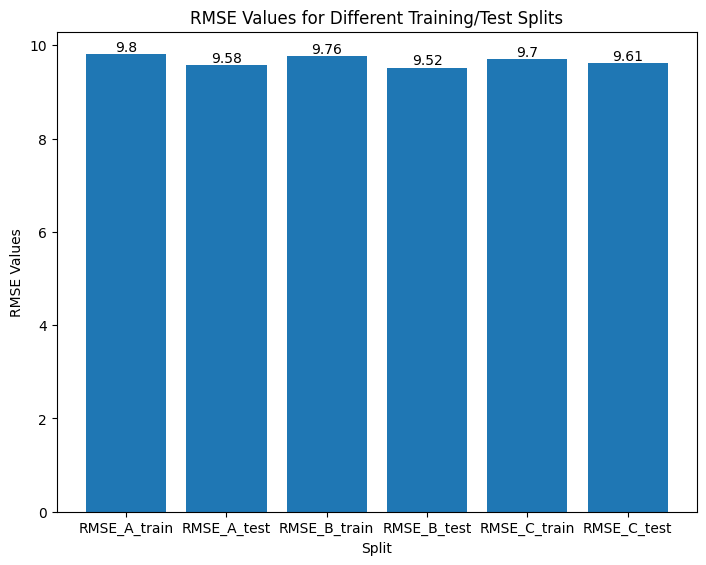

In [7]:
# 5. Generate a single bar chart (matplotlib.pyplot.bar) with all calculated RMSE values (it
# should contain 6 bars). Comparing RMSE values, discuss the performance of each model.
# (5 points)


# Assuming rmse_split_values contains your RMSE values
rmse_split_values = [rmseA_train, rmseA_test, rmseB_train, rmseB_test, rmseC_train, rmseC_test]
labels = ["RMSE_A_train", "RMSE_A_test", "RMSE_B_train", "RMSE_B_test", "RMSE_C_train", "RMSE_C_test"]

barfigure = plt.figure()
axis = barfigure.add_axes([0, 0, 1, 1])
bars = axis.bar(labels, rmse_split_values)

# Adding text labels to each bar
for bar in bars:
    yval = bar.get_height()
    axis.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title("RMSE Values for Different Training/Test Splits")
plt.ylabel("RMSE Values")
plt.xlabel("Split")
plt.show()
